In [1]:
from pycaret.regression import setup, compare_models, finalize_model, plot_model, save_model
from pycaret.datasets import get_data
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance_df = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
274,25,male,27.550,0,no,northwest,2523.16950
2,28,male,33.000,3,no,southeast,4449.46200
998,33,female,36.290,3,no,northeast,6551.75010
159,50,female,27.830,3,no,southeast,19749.38338
1250,24,male,29.830,0,yes,northeast,18648.42170
675,45,male,21.375,0,no,northwest,7222.78625
956,54,male,30.800,1,yes,southeast,41999.52000
1027,23,male,18.715,0,no,northwest,21595.38229
794,39,female,31.920,2,no,northwest,7209.49180
633,40,male,22.705,2,no,northeast,7173.35995


In [4]:
# Aktualizacja wartości w kolumnie `sex`
insurance_df['sex'] = insurance_df['sex'].replace({'male': 'mężczyzna', 'female': 'kobieta'})

# Aktualizacja wartości w kolumnie `smoker`
insurance_df['smoker'] = insurance_df['smoker'].replace({'yes': 'tak', 'no': 'nie'})

# Aktualizacja wartości w kolumnie `region`
insurance_df['region'] = insurance_df['region'].replace({
    'southeast': 'południowy wschód',
    'southwest': 'południowy zachód',
    'northeast': 'północny wschód',
    'northwest': 'północny zachód',
    })
insurance_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1307,32,mężczyzna,28.12,4,tak,północny zachód,21472.47880
44,38,mężczyzna,37.05,1,nie,północny wschód,6079.67150
598,43,mężczyzna,32.60,2,nie,południowy zachód,7441.50100
213,34,kobieta,26.73,1,nie,południowy wschód,5002.78270
696,53,kobieta,32.30,2,nie,północny wschód,29186.48236
260,58,kobieta,25.20,0,nie,południowy zachód,11837.16000
419,63,kobieta,26.98,0,tak,północny zachód,28950.46920
417,36,kobieta,22.60,2,tak,południowy zachód,18608.26200
1140,50,mężczyzna,37.07,1,nie,południowy wschód,9048.02730
523,38,kobieta,37.73,0,nie,południowy wschód,5397.61670


In [5]:
insurance_df['region'].value_counts()

południowy wschód    364
południowy zachód    325
północny zachód      325
północny wschód      324
Name: region, dtype: int64

In [6]:
len(insurance_df)

1338

In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,mężczyzna,30.59,0,nie,północny zachód,1639.5631


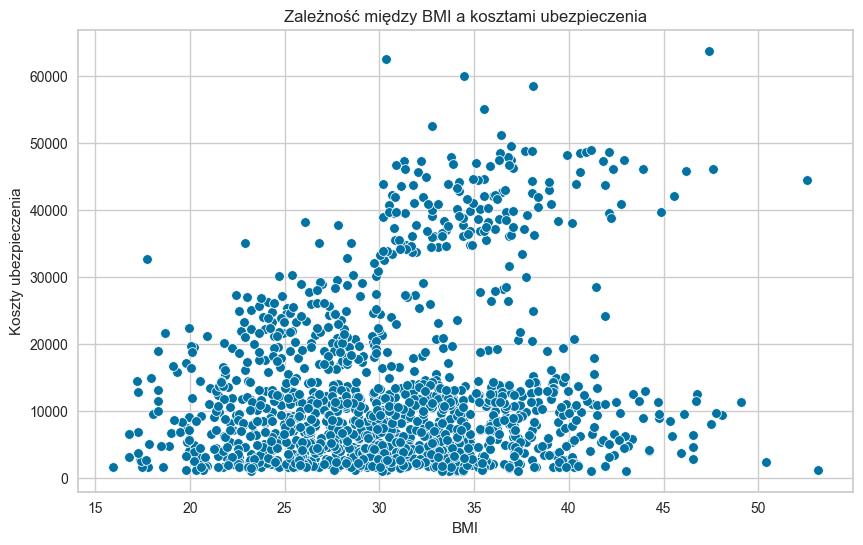

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_df)
plt.title('Zależność między BMI a kosztami ubezpieczenia')
plt.xlabel('BMI')
plt.ylabel('Koszty ubezpieczenia')
plt.grid(True)
plt.show()

In [3]:
s = setup(data=insurance_df, target='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [13]:
s.dataset.head()

,age,sex,bmi,children,smoker,region,charges
300,36,mężczyzna,27.549999,3,nie,północny wschód,6746.742676
904,60,kobieta,35.099998,0,nie,południowy zachód,12644.588867
670,30,mężczyzna,31.570000,3,nie,południowy wschód,4837.582520
617,49,mężczyzna,25.600000,2,tak,południowy zachód,23306.546875
373,26,mężczyzna,32.900002,2,tak,południowy zachód,36085.218750


In [14]:
s.dataset_transformed.head()

,age,sex,bmi,children,smoker,region_północny wschód,region_południowy zachód,region_południowy wschód,region_północny zachód,charges
300,36.0,1.0,27.549999,3.0,0.0,1.0,0.0,0.0,0.0,6746.742676
904,60.0,0.0,35.099998,0.0,0.0,0.0,1.0,0.0,0.0,12644.588867
670,30.0,1.0,31.570000,3.0,0.0,0.0,0.0,1.0,0.0,4837.582520
617,49.0,1.0,25.600000,2.0,1.0,0.0,1.0,0.0,0.0,23306.546875
373,26.0,1.0,32.900002,2.0,1.0,0.0,1.0,0.0,0.0,36085.218750


In [5]:
best_model = compare_models()
best_model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1890
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4010
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.2740
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2280
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3030
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1000
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0820
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0930
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0890
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.1040


GradientBoostingRegressor(random_state=123)

In [8]:
gbr_model = s.create_model('gbr', fold=5)
gbr_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2763.9727,25743427.3679,5073.7981,0.8483,0.4450,0.3158
1,2890.3466,22438164.2218,4736.8939,0.7747,0.5013,0.3840
2,2680.8114,22309805.9145,4723.3257,0.8474,0.4275,0.2879
3,2494.2239,22071438.3649,4698.0249,0.8657,0.4041,0.2714
4,2633.6288,23921964.7478,4891.0086,0.8454,0.4796,0.3437
Mean,2692.5967,23296960.1234,4824.6103,0.8363,0.4515,0.3206
Std,132.0359,1384900.0088,141.7603,0.0316,0.0350,0.0402


GradientBoostingRegressor(random_state=123)

In [11]:
tuned_gbr_model = s.tune_model(gbr_model, n_iter=50, optimize='R2')
tuned_gbr_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2872.1681,22239754.5174,4715.9044,0.8672,0.5981,0.3816
1,3035.9570,30947459.3866,5563.0441,0.8201,0.4575,0.3113
2,2926.1554,25170086.6463,5016.9798,0.6813,0.5598,0.3686
3,3051.7801,24838903.3536,4983.8643,0.7926,0.5310,0.4752
4,3107.8055,27994568.6100,5290.9894,0.7918,0.5223,0.3451
5,2890.0235,21405379.9003,4626.5948,0.8623,0.3963,0.3014
6,2608.7777,21868894.3623,4676.4190,0.8512,0.3893,0.2988
7,2756.7223,27116863.1551,5207.3854,0.8509,0.5040,0.2638
8,2532.0663,19541378.1984,4420.5631,0.8738,0.4521,0.3620


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


GradientBoostingRegressor(random_state=123)

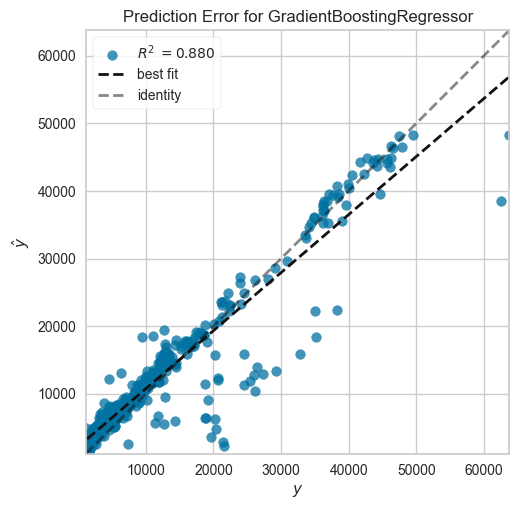

In [16]:
plot_model(best_model, plot='error')

In [10]:
best_model = s.compare_models([gbr_model, tuned_gbr_model])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.2280
1,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1500


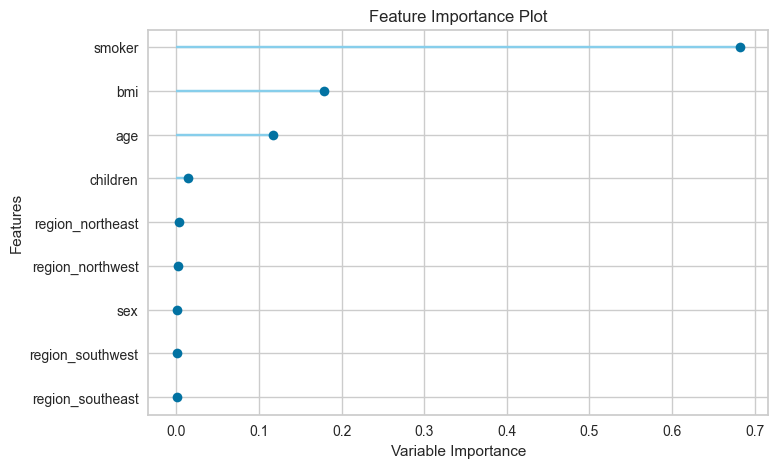

In [12]:
plot_model(best_model, plot='feature')

In [13]:
final_model = finalize_model(best_model)
save_model(final_model, 'v4_insurance_charge_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(